In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tabulate 
from tabulate import tabulate

In [2]:
df=pd.read_csv("FinalDatasetStudent.csv")
print(df.head())

   ID  Gender EthnicGroup          ParentEduc  Unnamed: 4 TestPrep  \
0   0  female         NaN   bachelor's degree         NaN     none   
1   1  female     group C        some college         NaN      NaN   
2   2  female     group B     master's degree         NaN     none   
3   3    male     group A  associate's degree         NaN     none   
4   4    male     group C        some college         NaN     none   

  ParentMarrStatus PracticeSport WklyStudyHours  MathScore MathGrade  \
0          married     regularly            < 5         71         C   
1          married     sometimes         10-May         69         D   
2           single     sometimes            < 5         87         B   
3          married         never         10-May         45         F   
4          married     sometimes         10-May         76         C   

   ReadingScore ReadingGrade  WritingScore WritingGrade OverallGrade  
0            71            C            74            C            C  
1   

# ABOUT DATASET

In [3]:
df.describe()

,ID,Unnamed: 4,MathScore,ReadingScore,WritingScore
count,30641.000000,0.0,30641.000000,30641.000000,30641.000000
mean,499.556607,NaN,66.558402,69.377533,68.418622
std,288.747894,NaN,15.361616,14.758952,15.443525
min,0.000000,NaN,0.000000,10.000000,4.000000
25%,249.000000,NaN,56.000000,59.000000,58.000000
50%,500.000000,NaN,67.000000,70.000000,69.000000
75%,750.000000,NaN,78.000000,80.000000,79.000000
max,999.000000,NaN,100.000000,100.000000,100.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30641 entries, 0 to 30640
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                30641 non-null  int64  
 1   Gender            30641 non-null  object 
 2   EthnicGroup       28801 non-null  object 
 3   ParentEduc        28796 non-null  object 
 4   Unnamed: 4        0 non-null      float64
 5   TestPrep          28811 non-null  object 
 6   ParentMarrStatus  29451 non-null  object 
 7   PracticeSport     30010 non-null  object 
 8   WklyStudyHours    29686 non-null  object 
 9   MathScore         30641 non-null  int64  
 10  MathGrade         30641 non-null  object 
 11  ReadingScore      30641 non-null  int64  
 12  ReadingGrade      30641 non-null  object 
 13  WritingScore      30641 non-null  int64  
 14  WritingGrade      30641 non-null  object 
 15  OverallGrade      30641 non-null  object 
dtypes: float64(1), int64(4), object(11)
memo

In [5]:
df.isnull().sum()

ID                      0
Gender                  0
EthnicGroup          1840
ParentEduc           1845
Unnamed: 4          30641
TestPrep             1830
ParentMarrStatus     1190
PracticeSport         631
WklyStudyHours        955
MathScore               0
MathGrade               0
ReadingScore            0
ReadingGrade            0
WritingScore            0
WritingGrade            0
OverallGrade            0
dtype: int64

# Cleaning

In [6]:
#Drop columns not required.

In [7]:
df = df.drop("Unnamed: 4", axis=1)
print(df.head())


   ID  Gender EthnicGroup          ParentEduc TestPrep ParentMarrStatus  \
0   0  female         NaN   bachelor's degree     none          married   
1   1  female     group C        some college      NaN          married   
2   2  female     group B     master's degree     none           single   
3   3    male     group A  associate's degree     none          married   
4   4    male     group C        some college     none          married   

  PracticeSport WklyStudyHours  MathScore MathGrade  ReadingScore  \
0     regularly            < 5         71         C            71   
1     sometimes         10-May         69         D            90   
2     sometimes            < 5         87         B            93   
3         never         10-May         45         F            56   
4     sometimes         10-May         76         C            78   

  ReadingGrade  WritingScore WritingGrade OverallGrade  
0            C            74            C            C  
1            A      

In [8]:
#wklystudyHours 10-may is actually 10-5 hours
#now changing it
df["WklyStudyHours"]=df["WklyStudyHours"].str.replace("10-May","5-10")
df.head()


,ID,Gender,EthnicGroup,ParentEduc,TestPrep,ParentMarrStatus,PracticeSport,WklyStudyHours,MathScore,MathGrade,ReadingScore,ReadingGrade,WritingScore,WritingGrade,OverallGrade
0,0,female,NaN,bachelor's degree,none,married,regularly,< 5,71,C,71,C,74,C,C
1,1,female,group C,some college,NaN,married,sometimes,5-10,69,D,90,A,88,B,B
2,2,female,group B,master's degree,none,single,sometimes,< 5,87,B,93,A,91,A,A
3,3,male,group A,associate's degree,none,married,never,5-10,45,F,56,E,42,F,F
4,4,male,group C,some college,none,married,sometimes,5-10,76,C,78,C,75,C,C


In [9]:
#Remove null values from columns
df=df.dropna()
print(df.head())

   ID  Gender EthnicGroup          ParentEduc   TestPrep ParentMarrStatus  \
2   2  female     group B     master's degree       none           single   
3   3    male     group A  associate's degree       none          married   
4   4    male     group C        some college       none          married   
5   5  female     group B  associate's degree       none          married   
6   6  female     group B        some college  completed          widowed   

  PracticeSport WklyStudyHours  MathScore MathGrade  ReadingScore  \
2     sometimes            < 5         87         B            93   
3         never           5-10         45         F            56   
4     sometimes           5-10         76         C            78   
5     regularly           5-10         73         C            84   
6         never           5-10         85         B            93   

  ReadingGrade  WritingScore WritingGrade OverallGrade  
2            A            91            A            A  
3       

In [10]:
df.isnull().sum()

ID                  0
Gender              0
EthnicGroup         0
ParentEduc          0
TestPrep            0
ParentMarrStatus    0
PracticeSport       0
WklyStudyHours      0
MathScore           0
MathGrade           0
ReadingScore        0
ReadingGrade        0
WritingScore        0
WritingGrade        0
OverallGrade        0
dtype: int64

In [11]:
unique_count = df['EthnicGroup'].nunique()

In [12]:
for column in df.columns:
    unique_count = df[column].nunique()
    print(f"Number of unique values in '{column}': {unique_count}")

Number of unique values in 'ID': 1000
Number of unique values in 'Gender': 2
Number of unique values in 'EthnicGroup': 5
Number of unique values in 'ParentEduc': 6
Number of unique values in 'TestPrep': 2
Number of unique values in 'ParentMarrStatus': 4
Number of unique values in 'PracticeSport': 3
Number of unique values in 'WklyStudyHours': 3
Number of unique values in 'MathScore': 95
Number of unique values in 'MathGrade': 6
Number of unique values in 'ReadingScore': 90
Number of unique values in 'ReadingGrade': 6
Number of unique values in 'WritingScore': 92
Number of unique values in 'WritingGrade': 6
Number of unique values in 'OverallGrade': 5


# Visualization


### Gender

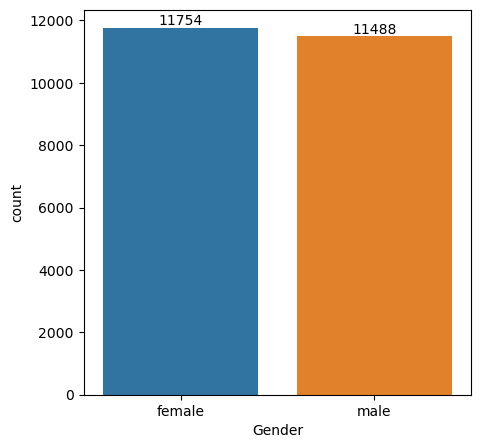

In [13]:
#Gender distribution
#Analysis: Female > male
plt.figure(figsize=(5,5))
ax=sns.countplot(data=df,x="Gender")
ax.bar_label(ax.containers[0])
plt.show()

### StudentScores Analysis: MathScore


In [14]:
#Max MathScore
selected_columns = ['ID','Gender','ParentEduc','TestPrep','ParentMarrStatus','PracticeSport','WklyStudyHours','MathScore','MathGrade']
max_math_score_row = df[df['MathScore'] == df['MathScore'].max()][selected_columns]
colalign = ["center"] * len(max_math_score_row.columns)
print(tabulate(max_math_score_row, headers='keys', tablefmt='pretty', showindex=False, colalign=colalign))


+-----+--------+--------------------+-----------+------------------+---------------+----------------+-----------+-----------+
| ID  | Gender |     ParentEduc     | TestPrep  | ParentMarrStatus | PracticeSport | WklyStudyHours | MathScore | MathGrade |
+-----+--------+--------------------+-----------+------------------+---------------+----------------+-----------+-----------+
| 149 |  male  | associate's degree | completed |     married      |   regularly   |      5-10      |    100    |     A     |
| 306 |  male  |    some college    | completed |     divorced     |   regularly   |      5-10      |    100    |     A     |
| 451 | female |    some college    |   none    |     married      |   sometimes   |      5-10      |    100    |     A     |
| 503 | female | associate's degree | completed |     married      |   regularly   |      > 10      |    100    |     A     |
| 916 |  male  | bachelor's degree  | completed |      single      |   regularly   |      5-10      |    100    |     

In [15]:
#Min MathScore
selected_columns = ['ID','Gender','ParentEduc','TestPrep','ParentMarrStatus','PracticeSport','WklyStudyHours','MathScore','MathGrade']
min_math_score_row = df[df['MathScore'] == df['MathScore'].min()][selected_columns]
colalign = ["center"] * len(min_math_score_row.columns)
print(tabulate(min_math_score_row, headers='keys', tablefmt='pretty', showindex=False, colalign=colalign))


+----+--------+------------------+----------+------------------+---------------+----------------+-----------+-----------+
| ID | Gender |    ParentEduc    | TestPrep | ParentMarrStatus | PracticeSport | WklyStudyHours | MathScore | MathGrade |
+----+--------+------------------+----------+------------------+---------------+----------------+-----------+-----------+
| 59 | female | some high school |   none   |      single      |   regularly   |      > 10      |     0     |     F     |
+----+--------+------------------+----------+------------------+---------------+----------------+-----------+-----------+


In [16]:
# Calculate the mean MathScore
mean_math_score = df['MathScore'].mean()

mean_math_score_row = pd.DataFrame({'MeanMathScore': [mean_math_score]})
print(tabulate(mean_math_score_row, headers='keys', tablefmt='pretty', showindex=False))


+-------------------+
|   MeanMathScore   |
+-------------------+
| 66.55330866534722 |
+-------------------+


In [17]:
mean_math_score = df['MathScore'].mean()
threshold = 5
selected_rows = df[(df['MathScore'] >= mean_math_score - threshold) & (df['MathScore'] <= mean_math_score + threshold)]

selected_columns = ['ID', 'Gender', 'EthnicGroup', 'ParentEduc', 'TestPrep', 'ParentMarrStatus', 'PracticeSport', 'WklyStudyHours', 'MathScore', 'MathGrade']
print(tabulate(selected_rows[selected_columns], headers='keys', tablefmt='pretty', showindex=False))


+-----+--------+-------------+--------------------+-----------+------------------+---------------+----------------+-----------+-----------+
| ID  | Gender | EthnicGroup |     ParentEduc     | TestPrep  | ParentMarrStatus | PracticeSport | WklyStudyHours | MathScore | MathGrade |
+-----+--------+-------------+--------------------+-----------+------------------+---------------+----------------+-----------+-----------+
|  8  |  male  |   group D   |    high school     | completed |      single      |   sometimes   |      > 10      |    65     |     D     |
| 12  | female |   group B   |    high school     |   none    |     married      |   regularly   |      5-10      |    66     |     D     |
| 20  |  male  |   group D   |    high school     |   none    |     married      |   sometimes   |      5-10      |    66     |     D     |
| 21  | female |   group B   |    some college    | completed |     married      |   sometimes   |      5-10      |    65     |     D     |
| 23  | female |   g

In [18]:
#Student Failed in Maths
failing_students = df[df['MathScore'] < 55]
total_failing_students = len(failing_students)

print("Total number of failing students:", total_failing_students)


Total number of failing students: 5130


In [19]:
#Student passed in Maths
passing_students = df[df['MathScore'] >=55]
total_passing_students = len(passing_students)

print("Total number of passed students:", total_passing_students)


Total number of passed students: 18112


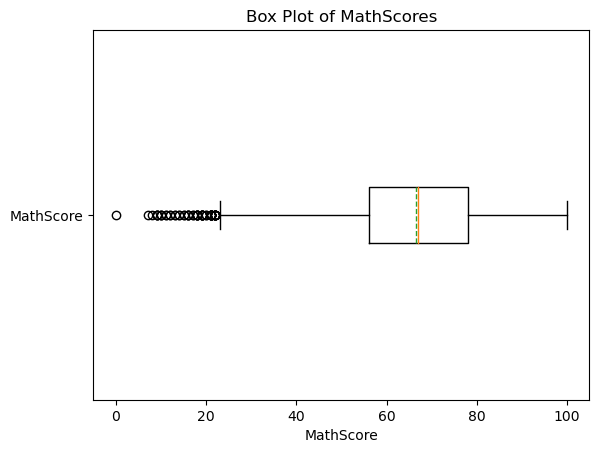

In [20]:
#box plot for MathScore
plt.boxplot(df['MathScore'], vert=False, showmeans=True, meanline=True, labels=['MathScore'])
plt.title('Box Plot of MathScores')
plt.xlabel('MathScore')
plt.show()


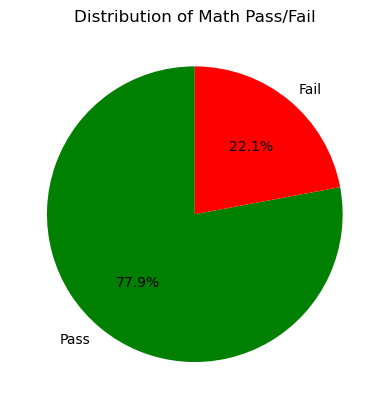

In [21]:
# Data for the pie chart
labels = ['Pass', 'Fail']
sizes = [total_passing_students, total_failing_students]

plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=['green', 'red'])
plt.title('Distribution of Math Pass/Fail')
plt.show()

### StudentScore Analysis:ReadingScores

In [22]:
#Max ReadingScore
selected_columns = ['ID','Gender','ParentEduc','TestPrep','ParentMarrStatus','PracticeSport','WklyStudyHours','ReadingScore']
max_Reading_score_row = df[df['ReadingScore'] == df['ReadingScore'].max()][selected_columns]
colalign = ["center"] * len(max_Reading_score_row.columns)
print(tabulate(max_Reading_score_row, headers='keys', tablefmt='pretty', showindex=False, colalign=colalign))


+-----+--------+--------------------+-----------+------------------+---------------+----------------+--------------+
| ID  | Gender |     ParentEduc     | TestPrep  | ParentMarrStatus | PracticeSport | WklyStudyHours | ReadingScore |
+-----+--------+--------------------+-----------+------------------+---------------+----------------+--------------+
| 106 | female |  master's degree   |   none    |     married      |   sometimes   |      5-10      |     100      |
| 149 |  male  | associate's degree | completed |     married      |   regularly   |      5-10      |     100      |
| 165 | female | bachelor's degree  | completed |     married      |   sometimes   |      5-10      |     100      |
| 179 | female |  some high school  | completed |     divorced     |   regularly   |      5-10      |     100      |
| 546 | female |  some high school  | completed |     married      |   sometimes   |      5-10      |     100      |
| 594 | female | bachelor's degree  | completed |     married   

In [23]:
#Min ReadingScore
selected_columns = ['ID','Gender','ParentEduc','TestPrep','ParentMarrStatus','PracticeSport','WklyStudyHours','ReadingScore','ReadingGrade']
min_Reading_score_row = df[df['ReadingScore'] == df['ReadingScore'].min()][selected_columns]
colalign = ["center"] * len(min_Reading_score_row.columns)
print(tabulate(min_Reading_score_row, headers='keys', tablefmt='pretty', showindex=False, colalign=colalign))


+----+--------+------------------+----------+------------------+---------------+----------------+--------------+--------------+
| ID | Gender |    ParentEduc    | TestPrep | ParentMarrStatus | PracticeSport | WklyStudyHours | ReadingScore | ReadingGrade |
+----+--------+------------------+----------+------------------+---------------+----------------+--------------+--------------+
| 23 |  male  | some high school |   none   |     married      |   sometimes   |      5-10      |      10      |      F       |
+----+--------+------------------+----------+------------------+---------------+----------------+--------------+--------------+


In [24]:
# Calculate the mean ReadingScore
mean_reading_score = df['ReadingScore'].mean()
mean_reading_score_row = pd.DataFrame({'MeanReadingScore': [mean_reading_score]})
print(tabulate(mean_reading_score_row, headers='keys', tablefmt='pretty', showindex=False))

+-------------------+
| MeanReadingScore  |
+-------------------+
| 69.39841665949574 |
+-------------------+


In [25]:
mean_reading_score = df['ReadingScore'].mean()
df['ReadingScoreDifference'] = abs(df['ReadingScore'] - mean_reading_score)

threshold = 5 
average_reading_score_students = df[df['ReadingScoreDifference'] <= threshold]
selected_columns = ['ID', 'Gender', 'ParentEduc', 'TestPrep', 'ParentMarrStatus', 'PracticeSport', 'WklyStudyHours', 'ReadingScore', 'ReadingGrade']

print(tabulate(average_reading_score_students[selected_columns], headers='keys', tablefmt='pretty', showindex=False))


+-----+--------+--------------------+-----------+------------------+---------------+----------------+--------------+--------------+
| ID  | Gender |     ParentEduc     | TestPrep  | ParentMarrStatus | PracticeSport | WklyStudyHours | ReadingScore | ReadingGrade |
+-----+--------+--------------------+-----------+------------------+---------------+----------------+--------------+--------------+
| 13  |  male  |    some college    | completed |      single      |   sometimes   |      > 10      |      73      |      C       |
| 20  |  male  |    high school     |   none    |     married      |   sometimes   |      5-10      |      69      |      D       |
| 23  | female |  some high school  |   none    |     divorced     |     never     |      5-10      |      71      |      C       |
| 27  | female | bachelor's degree  |   none    |     married      |   sometimes   |      > 10      |      70      |      C       |
| 28  |  male  |    high school     |   none    |     married      |   somet

In [26]:
#Number of student pass
passed_reading_count = df[df['ReadingGrade'] != 'F']['ID'].count()
print(f"Number of students who passed in Reading: {passed_reading_count}")


Number of students who passed in Reading: 19502


In [27]:
#Number of student fail
fail_reading_count = df[df['ReadingGrade'] =='F']['ID'].count()
print(f"Number of students who failed in Reading: {fail_reading_count}")


Number of students who failed in Reading: 3740


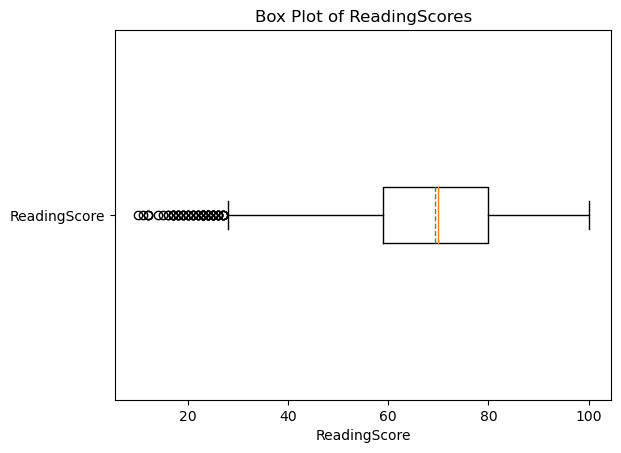

In [28]:
# Create a box plot for ReadingScore
plt.boxplot(df['ReadingScore'], vert=False, showmeans=True, meanline=True, labels=['ReadingScore'])
plt.title('Box Plot of ReadingScores')
plt.xlabel('ReadingScore')
plt.show()


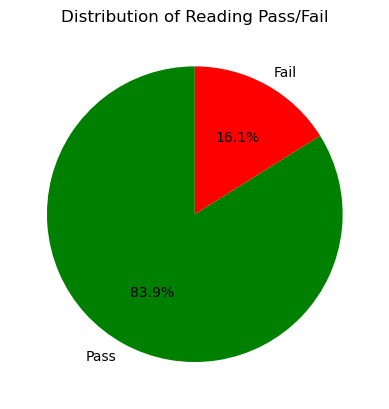

In [29]:
# Data for the pie chart
labels = ['Pass', 'Fail']
sizes = [passed_reading_count, fail_reading_count]

# Create a pie chart
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=['green', 'red'])
plt.title('Distribution of Reading Pass/Fail')
plt.show()

### StudentScore Analysis:WritingScores

In [30]:
#Max WritingScore
selected_columns = ['ID','Gender','ParentEduc','TestPrep','ParentMarrStatus','PracticeSport','WklyStudyHours','ReadingScore']
max_Writing_score_row = df[df['WritingScore'] == df['WritingScore'].max()][selected_columns]
colalign = ["center"] * len(max_Writing_score_row.columns)
print(tabulate(max_Writing_score_row, headers='keys', tablefmt='pretty', showindex=False, colalign=colalign))


+-----+--------+--------------------+-----------+------------------+---------------+----------------+--------------+
| ID  | Gender |     ParentEduc     | TestPrep  | ParentMarrStatus | PracticeSport | WklyStudyHours | ReadingScore |
+-----+--------+--------------------+-----------+------------------+---------------+----------------+--------------+
| 106 | female |  master's degree   |   none    |     married      |   sometimes   |      5-10      |     100      |
| 114 | female | bachelor's degree  | completed |     married      |   regularly   |      < 5       |      99      |
| 165 | female | bachelor's degree  | completed |     married      |   sometimes   |      5-10      |     100      |
| 179 | female |  some high school  | completed |     divorced     |   regularly   |      5-10      |     100      |
| 377 | female |  master's degree   | completed |      single      |   sometimes   |      5-10      |      95      |
| 403 | female |    high school     | completed |      single   

In [31]:
#Min WritingScore
selected_columns = ['ID','Gender','ParentEduc','TestPrep','ParentMarrStatus','PracticeSport','WklyStudyHours','ReadingScore','ReadingGrade']
min_Writing_score_row = df[df['WritingScore'] == df['WritingScore'].min()][selected_columns]
colalign = ["center"] * len(min_Writing_score_row.columns)
print(tabulate(min_Writing_score_row, headers='keys', tablefmt='pretty', showindex=False, colalign=colalign))


+-----+--------+--------------------+----------+------------------+---------------+----------------+--------------+--------------+
| ID  | Gender |     ParentEduc     | TestPrep | ParentMarrStatus | PracticeSport | WklyStudyHours | ReadingScore | ReadingGrade |
+-----+--------+--------------------+----------+------------------+---------------+----------------+--------------+--------------+
| 834 |  male  | associate's degree |   none   |     divorced     |     never     |      5-10      |      14      |      F       |
+-----+--------+--------------------+----------+------------------+---------------+----------------+--------------+--------------+


In [32]:
# Calculate the mean WritingScore
mean_writing_score = df['WritingScore'].mean()
mean_writing_score_row = pd.DataFrame({'MeanWritingScore': [mean_writing_score]})
print(tabulate(mean_writing_score_row, headers='keys', tablefmt='pretty', showindex=False))

+------------------+
| MeanWritingScore |
+------------------+
| 68.4545650116169 |
+------------------+


In [33]:
mean_writing_score = df['WritingScore'].mean()
df['WritingScoreDifference'] = abs(df['WritingScore'] - mean_writing_score)

threshold = 5 
average_writing_score_students = df[df['WritingScoreDifference'] <= threshold]
selected_columns = ['ID', 'Gender', 'ParentEduc', 'TestPrep', 'ParentMarrStatus', 'PracticeSport', 'WklyStudyHours', 'WritingScore', 'WritingGrade']

print(tabulate(average_writing_score_students[selected_columns], headers='keys', tablefmt='pretty', showindex=False))


+-----+--------+--------------------+-----------+------------------+---------------+----------------+--------------+--------------+
| ID  | Gender |     ParentEduc     | TestPrep  | ParentMarrStatus | PracticeSport | WklyStudyHours | WritingScore | WritingGrade |
+-----+--------+--------------------+-----------+------------------+---------------+----------------+--------------+--------------+
|  8  |  male  |    high school     | completed |      single      |   sometimes   |      > 10      |      68      |      D       |
| 13  |  male  |    some college    | completed |      single      |   sometimes   |      > 10      |      71      |      C       |
| 21  | female |    some college    | completed |     married      |   sometimes   |      5-10      |      70      |      C       |
| 23  | female |  some high school  |   none    |     divorced     |     never     |      5-10      |      71      |      C       |
| 28  |  male  |    high school     |   none    |     married      |   somet

In [34]:
#Number of student pass
passed_writing_count = df[df['WritingGrade'] != 'F']['ID'].count()
print(f"Number of students who passed in Writing: {passed_writing_count}")


Number of students who passed in Writing: 18826


In [35]:
#Number of student failed
fail_writing_count = df[df['WritingGrade']== 'F']['ID'].count()
print(f"Number of students who failed in Writing: {fail_writing_count}")


Number of students who failed in Writing: 4416


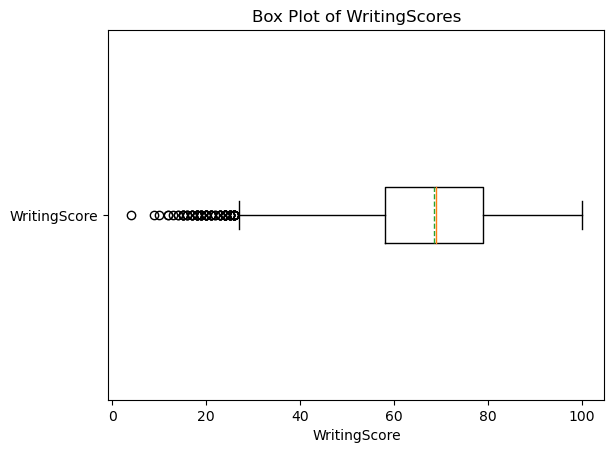

In [36]:
#box plot for WritingScore
plt.boxplot(df['WritingScore'], vert=False, showmeans=True, meanline=True, labels=['WritingScore'])
plt.title('Box Plot of WritingScores')
plt.xlabel('WritingScore')
plt.show()


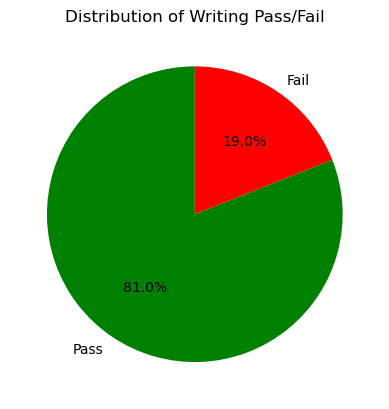

In [37]:
# Data for the pie chart
labels = ['Pass', 'Fail']
sizes = [passed_writing_count, fail_writing_count]

# Create a pie chart
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=['green', 'red'])
plt.title('Distribution of Writing Pass/Fail')
plt.show()

# OverAll Visualization

### w.r.t ParentEduc

#####  Results: since difference is 11 btw mean high and low so it can be deduce that parent educ effects marks.

In [38]:
gb=df.groupby("ParentEduc").agg({"MathScore":'mean',"ReadingScore":'mean',"WritingScore":'mean'})
print(gb)

                    MathScore  ReadingScore  WritingScore
ParentEduc                                               
associate's degree  68.361451     71.155798     70.353216
bachelor's degree   70.464804     73.134978     73.405660
high school         64.388816     67.232634     65.441896
master's degree     72.179268     75.739024     76.261585
some college        66.494826     69.201693     68.569520
some high school    62.537444     65.445067     63.567040


Text(0.5, 1.0, "Relationship Between ParentEduc and Student's Scores")

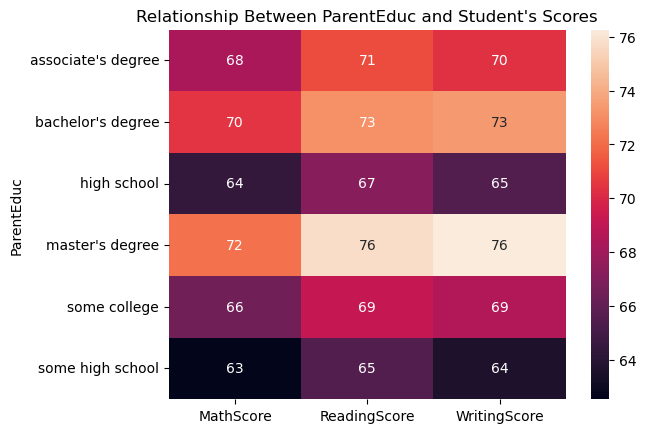

In [39]:
sns.heatmap(gb,annot=True)
plt.title("Relationship Between ParentEduc and Student's Scores")

In [40]:
failed_students = df[df['MathGrade'] == 'F']
failed_by_parent_educ = failed_students['ParentEduc'].value_counts().reset_index()

failed_by_parent_educ.columns = ['ParentEduc', 'Number of Failed Students']
print(failed_by_parent_educ)
print("\n")

passed_students = df[df['MathGrade'] != 'F']
passed_by_parent_educ = passed_students['ParentEduc'].value_counts().reset_index()

passed_by_parent_educ.columns = ['ParentEduc', 'Number of Passed Students']
print(passed_by_parent_educ)

           ParentEduc  Number of Failed Students
0    some high school                       1359
1         high school                       1176
2        some college                       1153
3  associate's degree                        826
4   bachelor's degree                        411
5     master's degree                        205


           ParentEduc  Number of Passed Students
0        some college                       4162
1  associate's degree                       3667
2         high school                       3402
3    some high school                       3101
4   bachelor's degree                       2345
5     master's degree                       1435


In [41]:
failed_students = df[df['ReadingGrade'] == 'F']

failed_by_parent_educ = failed_students['ParentEduc'].value_counts().reset_index()

failed_by_parent_educ.columns = ['ParentEduc', 'Number of Failed Students']
print(failed_by_parent_educ)

print("\n")


passed_students = df[df['ReadingGrade'] != 'F']
passed_by_parent_educ = passed_students['ParentEduc'].value_counts().reset_index()

passed_by_parent_educ.columns = ['ParentEduc', 'Number of Passed Students']
print(passed_by_parent_educ)

           ParentEduc  Number of Failed Students
0    some high school                       1007
1         high school                        903
2        some college                        830
3  associate's degree                        582
4   bachelor's degree                        284
5     master's degree                        134


           ParentEduc  Number of Passed Students
0        some college                       4485
1  associate's degree                       3911
2         high school                       3675
3    some high school                       3453
4   bachelor's degree                       2472
5     master's degree                       1506


In [42]:
failed_students = df[df['WritingGrade'] == 'F']

failed_by_parent_educ = failed_students['ParentEduc'].value_counts().reset_index()

failed_by_parent_educ.columns = ['ParentEduc', 'Number of Failed Students']
print(failed_by_parent_educ)

print("\n")

passed_students = df[df['WritingGrade'] != 'F']
passed_by_parent_educ = passed_students['ParentEduc'].value_counts().reset_index()

passed_by_parent_educ.columns = ['ParentEduc', 'Number of Passed Students']
print(passed_by_parent_educ)

           ParentEduc  Number of Failed Students
0    some high school                       1243
1         high school                       1079
2        some college                        953
3  associate's degree                        682
4   bachelor's degree                        308
5     master's degree                        151


           ParentEduc  Number of Passed Students
0        some college                       4362
1  associate's degree                       3811
2         high school                       3499
3    some high school                       3217
4   bachelor's degree                       2448
5     master's degree                       1489


### w.r.t ParentMaritalStatus

##### Results: Negligible impact on Students Scores

In [43]:
gb1=df.groupby("ParentMarrStatus").agg({"MathScore":'mean',"ReadingScore":'mean',"WritingScore":'mean'})
print(gb1)

                  MathScore  ReadingScore  WritingScore
ParentMarrStatus                                       
divorced          66.575332     69.628958     68.761236
married           66.610948     69.340928     68.370629
single            66.289899     69.312365     68.388390
widowed           67.876890     70.133909     69.066955


Text(0.5, 1.0, "Relationship Between Parent Marital Status and Student's Scores")

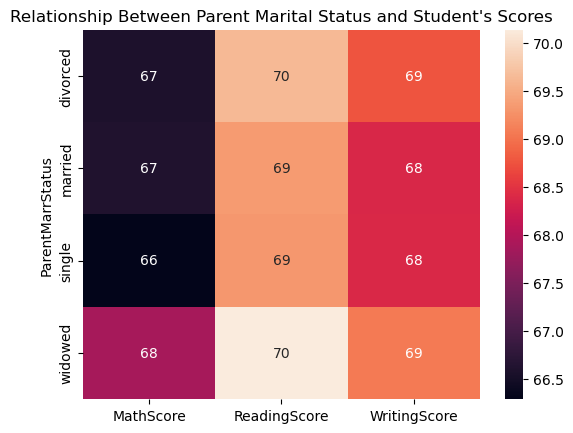

In [44]:
sns.heatmap(gb1,annot=True)
plt.title("Relationship Between Parent Marital Status and Student's Scores")

In [45]:
failed_math_students = df[df['MathGrade'] == 'F']
failed_reading_students = df[df['ReadingGrade'] == 'F']
failed_writing_students = df[df['WritingGrade'] == 'F']

failed_math_by_parent_status = failed_math_students['ParentMarrStatus'].value_counts().reset_index()
failed_reading_by_parent_status = failed_reading_students['ParentMarrStatus'].value_counts().reset_index()
failed_writing_by_parent_status = failed_writing_students['ParentMarrStatus'].value_counts().reset_index()

print("Number of Failed Math Students by Parent Marital Status:")
print(failed_math_by_parent_status)

print("\nNumber of Failed Reading Students by Parent Marital Status:")
print(failed_reading_by_parent_status)

print("\nNumber of Failed Writing Students by Parent Marital Status:")
print(failed_writing_by_parent_status)


Number of Failed Math Students by Parent Marital Status:
      index  ParentMarrStatus
0   married              2943
1    single              1233
2  divorced               856
3   widowed                98

Number of Failed Reading Students by Parent Marital Status:
      index  ParentMarrStatus
0   married              2158
1    single               898
2  divorced               613
3   widowed                71

Number of Failed Writing Students by Parent Marital Status:
      index  ParentMarrStatus
0   married              2559
1    single              1057
2  divorced               714
3   widowed                86


In [46]:
passing_math_students = df[df['MathGrade'] != 'F']
passing_reading_students = df[df['ReadingGrade'] != 'F']
passing_writing_students = df[df['WritingGrade'] != 'F']

passing_math_by_parent_status = passing_math_students['ParentMarrStatus'].value_counts().reset_index()
passing_reading_by_parent_status = passing_reading_students['ParentMarrStatus'].value_counts().reset_index()
passing_writing_by_parent_status = passing_writing_students['ParentMarrStatus'].value_counts().reset_index()

print("Number of Passing Math Students by Parent Marital Status:")
print(passing_math_by_parent_status)

print("\nNumber of Passing Reading Students by Parent Marital Status:")
print(passing_reading_by_parent_status)

print("\nNumber of Passing Writing Students by Parent Marital Status:")
print(passing_writing_by_parent_status)


Number of Passing Math Students by Parent Marital Status:
      index  ParentMarrStatus
0   married             10356
1    single              4331
2  divorced              3060
3   widowed               365

Number of Passing Reading Students by Parent Marital Status:
      index  ParentMarrStatus
0   married             11141
1    single              4666
2  divorced              3303
3   widowed               392

Number of Passing Writing Students by Parent Marital Status:
      index  ParentMarrStatus
0   married             10740
1    single              4507
2  divorced              3202
3   widowed               377


### w.r.t TestPrep

#### Results: The difference in result is of 10 hence , TestPrep has major effects on Student Scores

In [47]:
gb3=df.groupby("TestPrep").agg({"MathScore":'mean',"ReadingScore":'mean',"WritingScore":'mean'})
print(gb3)

           MathScore  ReadingScore  WritingScore
TestPrep                                        
completed  69.566958     73.751621     74.749377
none       64.965510     67.104848     65.138024


Text(0.5, 1.0, "Relationship Between TestPrep Status and Student's Scores")

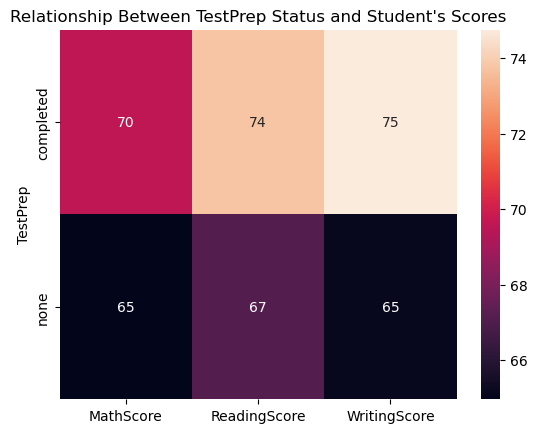

In [48]:
sns.heatmap(gb3,annot=True)
plt.title("Relationship Between TestPrep Status and Student's Scores")

In [49]:
# students who have 'none' in TestPrep and failed
no_test_prep_students = df[df['TestPrep'] == 'none']

failed_math_no_test_prep = no_test_prep_students[no_test_prep_students['MathGrade'] == 'F']

failed_reading_no_test_prep = no_test_prep_students[no_test_prep_students['ReadingGrade'] == 'F']

failed_writing_no_test_prep = no_test_prep_students[no_test_prep_students['WritingGrade'] == 'F']

failed_all_courses_no_test_prep = set(failed_math_no_test_prep['ID']) & set(failed_reading_no_test_prep['ID']) & set(failed_writing_no_test_prep['ID'])

print("Total number of students with no test preparation:", len(no_test_prep_students))
print("Total number of students who failed in Math among those with no test preparation:", len(failed_math_no_test_prep))
print("Total number of students who failed in Reading among those with no test preparation:", len(failed_reading_no_test_prep))
print("Total number of students who failed in Writing among those with no test preparation:", len(failed_writing_no_test_prep))


Total number of students with no test preparation: 15222
Total number of students who failed in Math among those with no test preparation: 3758
Total number of students who failed in Reading among those with no test preparation: 2971
Total number of students who failed in Writing among those with no test preparation: 3691


In [50]:
# students who have 'none' in TestPrep and passed
none_test_prep_students = df[df['TestPrep'] == 'none']

passed_math_none_test_prep = none_test_prep_students[none_test_prep_students['MathGrade'] != 'F']

passed_reading_none_test_prep = none_test_prep_students[none_test_prep_students['ReadingGrade'] != 'F']

passed_writing_none_test_prep = none_test_prep_students[none_test_prep_students['WritingGrade'] != 'F']

passed_all_courses_none_test_prep = set(passed_math_none_test_prep['ID']) & set(passed_reading_none_test_prep['ID']) & set(passed_writing_none_test_prep['ID'])

print("Total number of students with 'none' in TestPrep:", len(none_test_prep_students))
print("Total number of students who passed in Math among those with 'none' in TestPrep:", len(passed_math_none_test_prep))
print("Total number of students who passed in Reading among those with 'none' in TestPrep:", len(passed_reading_none_test_prep))
print("Total number of students who passed in Writing among those with 'none' in TestPrep:", len(passed_writing_none_test_prep))
print("Total number of students who passed in every individual course among those with 'none' in TestPrep:", len(passed_all_courses_none_test_prep))


Total number of students with 'none' in TestPrep: 15222
Total number of students who passed in Math among those with 'none' in TestPrep: 11464
Total number of students who passed in Reading among those with 'none' in TestPrep: 12251
Total number of students who passed in Writing among those with 'none' in TestPrep: 11531
Total number of students who passed in every individual course among those with 'none' in TestPrep: 1000


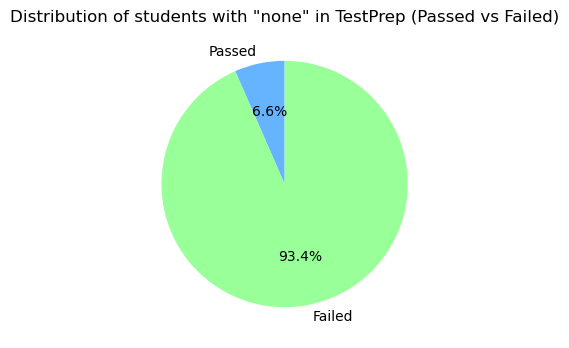

In [51]:
none_test_prep_passed = len(passed_all_courses_none_test_prep)
none_test_prep_failed = len(none_test_prep_students) - none_test_prep_passed

labels = ['Passed', 'Failed']
sizes = [none_test_prep_passed, none_test_prep_failed]
colors = ['#66b3ff', '#99ff99']  # Blue for Passed, Green for Failed

plt.figure(figsize=(4, 4))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, startangle=90)
plt.title('Distribution of students with "none" in TestPrep (Passed vs Failed)')
plt.show()

In [52]:
# students who have 'completed' in TestPrep and failed
completed_test_prep_students = df[df['TestPrep'] == 'completed']

failed_math_completed_test_prep = completed_test_prep_students[completed_test_prep_students['MathGrade'] == 'F']

failed_reading_completed_test_prep = completed_test_prep_students[completed_test_prep_students['ReadingGrade'] == 'F']

failed_writing_completed_test_prep = completed_test_prep_students[completed_test_prep_students['WritingGrade'] == 'F']

failed_all_courses_completed_test_prep = set(failed_math_completed_test_prep['ID']) & set(failed_reading_completed_test_prep['ID']) & set(failed_writing_completed_test_prep['ID'])

print("Total number of students with completed test preparation:", len(completed_test_prep_students))
print("Total number of students who failed in Math among those with completed test preparation:", len(failed_math_completed_test_prep))
print("Total number of students who failed in Reading among those with completed test preparation:", len(failed_reading_completed_test_prep))
print("Total number of students who failed in Writing among those with completed test preparation:", len(failed_writing_completed_test_prep))
print("Total number of students who failed in every individual course among those with completed test preparation:", len(failed_all_courses_completed_test_prep))


Total number of students with completed test preparation: 8020
Total number of students who failed in Math among those with completed test preparation: 1372
Total number of students who failed in Reading among those with completed test preparation: 769
Total number of students who failed in Writing among those with completed test preparation: 725
Total number of students who failed in every individual course among those with completed test preparation: 429


In [53]:
# students who have 'completed' in TestPrep and passed
completed_test_prep_students = df[df['TestPrep'] == 'completed']

passed_math_completed_test_prep = completed_test_prep_students[completed_test_prep_students['MathGrade'] != 'F']

passed_reading_completed_test_prep = completed_test_prep_students[completed_test_prep_students['ReadingGrade'] != 'F']

passed_writing_completed_test_prep = completed_test_prep_students[completed_test_prep_students['WritingGrade'] != 'F']

passed_all_courses_completed_test_prep = set(passed_math_completed_test_prep['ID']) & set(passed_reading_completed_test_prep['ID']) & set(passed_writing_completed_test_prep['ID'])

print("Total number of students with completed test preparation:", len(completed_test_prep_students))
print("Total number of students who passed in Math among those with completed test preparation:", len(passed_math_completed_test_prep))
print("Total number of students who passed in Reading among those with completed test preparation:", len(passed_reading_completed_test_prep))
print("Total number of students who passed in Writing among those with completed test preparation:", len(passed_writing_completed_test_prep))
print("Total number of students who passed in every individual course among those with completed test preparation:", len(passed_all_courses_completed_test_prep))


Total number of students with completed test preparation: 8020
Total number of students who passed in Math among those with completed test preparation: 6648
Total number of students who passed in Reading among those with completed test preparation: 7251
Total number of students who passed in Writing among those with completed test preparation: 7295
Total number of students who passed in every individual course among those with completed test preparation: 999


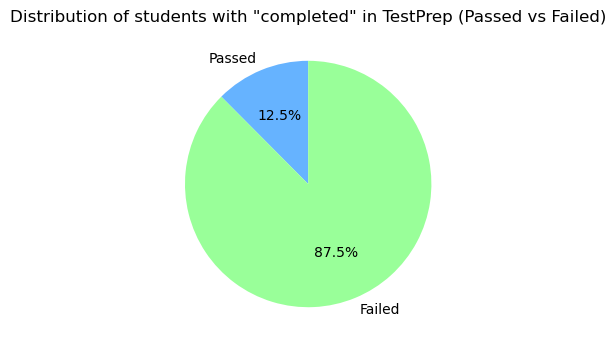

In [54]:
completed_test_prep_passed = len(passed_all_courses_completed_test_prep)
completed_test_prep_failed = len(completed_test_prep_students) - completed_test_prep_passed

labels = ['Passed', 'Failed']
sizes = [completed_test_prep_passed, completed_test_prep_failed]
colors = ['#66b3ff', '#99ff99']  # Blue for Passed, Green for Failed

plt.figure(figsize=(4,4))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, startangle=90)
plt.title('Distribution of students with "completed" in TestPrep (Passed vs Failed)')
plt.show()


In [55]:
# None Highest and Lowest marks

#rows where TestPrep is 'none'
none_test_prep_students = df[df['TestPrep'] == 'none']

lowest_marks_row = none_test_prep_students.loc[none_test_prep_students[['MathScore', 'ReadingScore', 'WritingScore']].idxmin()]
lowest_marks_row = lowest_marks_row[['ID', 'MathScore', 'ReadingScore', 'WritingScore']]

highest_marks_row = none_test_prep_students.loc[none_test_prep_students[['MathScore', 'ReadingScore', 'WritingScore']].idxmax()]
highest_marks_row = highest_marks_row[['ID', 'MathScore', 'ReadingScore', 'WritingScore']]

print("Student with TestPrep as 'none' and lowest marks:")
print(lowest_marks_row)

print("\nStudent with TestPrep as 'none' and highest marks:")
print(highest_marks_row)


Student with TestPrep as 'none' and lowest marks:
        ID  MathScore  ReadingScore  WritingScore
55      59          0            17            10
27218   23         28            10            13
30389  834         24            14             4

Student with TestPrep as 'none' and highest marks:
      ID  MathScore  ReadingScore  WritingScore
425  451        100            92            97
97   106         87           100           100
97   106         87           100           100


In [56]:
#Completed Highest and Lowest

#rows where TestPrep is 'completed'
completed_test_prep_students = df[df['TestPrep'] == 'completed']

lowest_marks_row_completed = completed_test_prep_students.loc[completed_test_prep_students[['MathScore', 'ReadingScore', 'WritingScore']].idxmin()]
lowest_marks_row_completed = lowest_marks_row_completed[['ID', 'MathScore', 'ReadingScore', 'WritingScore']]

highest_marks_row_completed = completed_test_prep_students.loc[completed_test_prep_students[['MathScore', 'ReadingScore', 'WritingScore']].idxmax()]
highest_marks_row_completed = highest_marks_row_completed[['ID', 'MathScore', 'ReadingScore', 'WritingScore']]

print("Student with TestPrep as 'completed' and lowest marks:")
print(lowest_marks_row_completed)

print("\nStudent with TestPrep as 'completed' and highest marks:")
print(highest_marks_row_completed)


Student with TestPrep as 'completed' and lowest marks:
        ID  MathScore  ReadingScore  WritingScore
28597  510          9            32            32
8559    60         26            19            19
8559    60         26            19            19

Student with TestPrep as 'completed' and highest marks:
      ID  MathScore  ReadingScore  WritingScore
138  149        100           100            95
138  149        100           100            95
105  114         98            99           100


### w.r.t WeeklyHours

#### Result: Difference is not much, very minor effect on StudentScores can be seen.

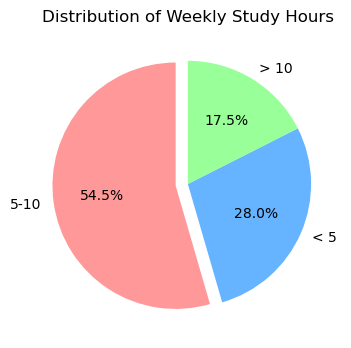

In [57]:
study_hours_counts = df['WklyStudyHours'].value_counts()

labels = study_hours_counts.index
sizes = study_hours_counts.values
colors = ['#ff9999', '#66b3ff', '#99ff99']
explode = (0.1, 0, 0)  # explode the 1st slice

plt.figure(figsize=(4, 4))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, explode=explode, startangle=90)
plt.title('Distribution of Weekly Study Hours')
plt.show()

In [58]:
gb2=df.groupby("WklyStudyHours").agg({"MathScore":'mean',"ReadingScore":'mean',"WritingScore":'mean'})
print(gb2)

                MathScore  ReadingScore  WritingScore
WklyStudyHours                                       
5-10            66.863403     69.621792     68.631978
< 5             64.512462     68.242615     67.173692
> 10            68.843758     70.547216     69.945548


Text(0.5, 1.0, "Relationship Between WklyStudyHours Status and Student's Scores")

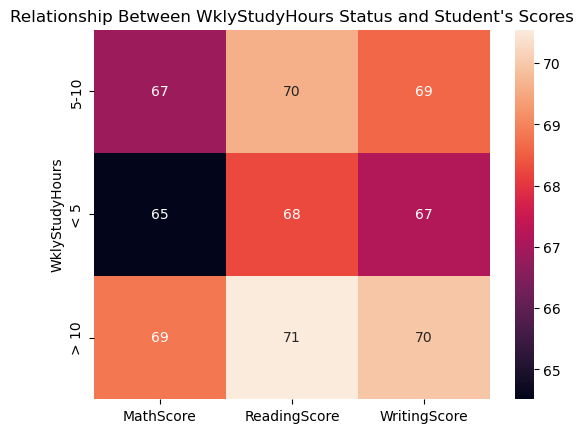

In [59]:
sns.heatmap(gb2,annot=True)
plt.title("Relationship Between WklyStudyHours Status and Student's Scores")


### w.r.t Practice Sports

#### Results: The difeerence is scores is of 1 or 2 it is showing some effects on scores , however, scores are not really affected by it.

In [60]:
gb4=df.groupby("PracticeSport").agg({"MathScore":'mean',"ReadingScore":'mean',"WritingScore":'mean'})
print(gb4)

               MathScore  ReadingScore  WritingScore
PracticeSport                                       
never          64.399156     68.578759     66.821046
regularly      67.616437     69.808991     69.471931
sometimes      66.357125     69.319439     68.154743


Text(0.5, 1.0, "Relationship Between PracticeSport Status and Student's Scores")

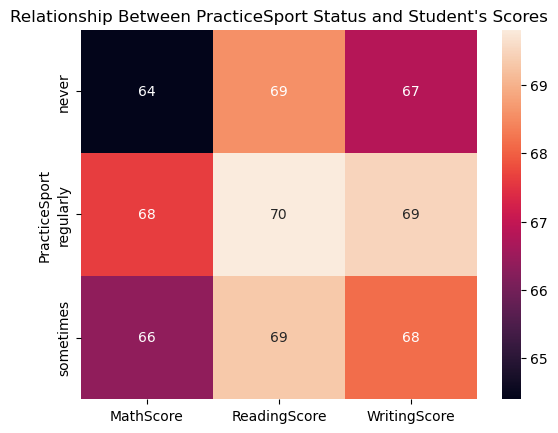

In [61]:
sns.heatmap(gb4,annot=True)
plt.title("Relationship Between PracticeSport Status and Student's Scores")

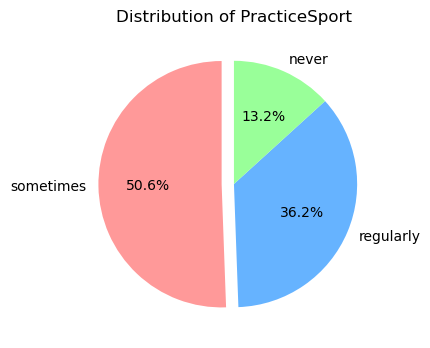

In [62]:
PracticeSportcounts = df['PracticeSport'].value_counts()

labels = PracticeSportcounts.index
sizes = PracticeSportcounts.values
colors = ['#ff9999', '#66b3ff', '#99ff99']
explode = (0.1, 0, 0)  # explode the 1st slice

plt.figure(figsize=(4, 4))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, explode=explode, startangle=90)
plt.title('Distribution of PracticeSport')
plt.show()

# Machine Learning Algorithm:

In [63]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [64]:
df=pd.read_csv("FinalDatasetStudent.csv")
df.head()

,ID,Gender,EthnicGroup,ParentEduc,Unnamed: 4,TestPrep,ParentMarrStatus,PracticeSport,WklyStudyHours,MathScore,MathGrade,ReadingScore,ReadingGrade,WritingScore,WritingGrade,OverallGrade
0,0,female,NaN,bachelor's degree,NaN,none,married,regularly,< 5,71,C,71,C,74,C,C
1,1,female,group C,some college,NaN,NaN,married,sometimes,10-May,69,D,90,A,88,B,B
2,2,female,group B,master's degree,NaN,none,single,sometimes,< 5,87,B,93,A,91,A,A
3,3,male,group A,associate's degree,NaN,none,married,never,10-May,45,F,56,E,42,F,F
4,4,male,group C,some college,NaN,none,married,sometimes,10-May,76,C,78,C,75,C,C


In [65]:
df = df.drop("Unnamed: 4", axis=1)
print(df.head())


   ID  Gender EthnicGroup          ParentEduc TestPrep ParentMarrStatus  \
0   0  female         NaN   bachelor's degree     none          married   
1   1  female     group C        some college      NaN          married   
2   2  female     group B     master's degree     none           single   
3   3    male     group A  associate's degree     none          married   
4   4    male     group C        some college     none          married   

  PracticeSport WklyStudyHours  MathScore MathGrade  ReadingScore  \
0     regularly            < 5         71         C            71   
1     sometimes         10-May         69         D            90   
2     sometimes            < 5         87         B            93   
3         never         10-May         45         F            56   
4     sometimes         10-May         76         C            78   

  ReadingGrade  WritingScore WritingGrade OverallGrade  
0            C            74            C            C  
1            A      

In [66]:
#wklystudyHours 10-may is actually 10-5 hours
#now changing it
df["WklyStudyHours"]=df["WklyStudyHours"].str.replace("10-May","5-10")
df.head()


,ID,Gender,EthnicGroup,ParentEduc,TestPrep,ParentMarrStatus,PracticeSport,WklyStudyHours,MathScore,MathGrade,ReadingScore,ReadingGrade,WritingScore,WritingGrade,OverallGrade
0,0,female,NaN,bachelor's degree,none,married,regularly,< 5,71,C,71,C,74,C,C
1,1,female,group C,some college,NaN,married,sometimes,5-10,69,D,90,A,88,B,B
2,2,female,group B,master's degree,none,single,sometimes,< 5,87,B,93,A,91,A,A
3,3,male,group A,associate's degree,none,married,never,5-10,45,F,56,E,42,F,F
4,4,male,group C,some college,none,married,sometimes,5-10,76,C,78,C,75,C,C


In [67]:
#Remove null values from columns
df=df.dropna()
print(df.head())

   ID  Gender EthnicGroup          ParentEduc   TestPrep ParentMarrStatus  \
2   2  female     group B     master's degree       none           single   
3   3    male     group A  associate's degree       none          married   
4   4    male     group C        some college       none          married   
5   5  female     group B  associate's degree       none          married   
6   6  female     group B        some college  completed          widowed   

  PracticeSport WklyStudyHours  MathScore MathGrade  ReadingScore  \
2     sometimes            < 5         87         B            93   
3         never           5-10         45         F            56   
4     sometimes           5-10         76         C            78   
5     regularly           5-10         73         C            84   
6         never           5-10         85         B            93   

  ReadingGrade  WritingScore WritingGrade OverallGrade  
2            A            91            A            A  
3       

In [68]:
df.isnull().sum()

ID                  0
Gender              0
EthnicGroup         0
ParentEduc          0
TestPrep            0
ParentMarrStatus    0
PracticeSport       0
WklyStudyHours      0
MathScore           0
MathGrade           0
ReadingScore        0
ReadingGrade        0
WritingScore        0
WritingGrade        0
OverallGrade        0
dtype: int64

In [93]:
df = df.drop(['WklyStudyHours', 'PracticeSport'], axis=1)

In [105]:
features = df.drop(['OverallGrade', 'MathGrade', 'ReadingGrade', 'WritingGrade'], axis=1)
target = df['OverallGrade']


In [106]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [110]:
model = RandomForestRegressor(random_state=42)


In [111]:
# Assuming 'A', 'B', 'C', etc. are grades
grade_mapping = {'A': 4, 'B': 3, 'C': 2, 'D': 1, 'F': 0}

# Map grades to numerical values in the target variable
y_train = y_train.map(grade_mapping)
y_test = y_test.map(grade_mapping)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [112]:
y_pred = model.predict(X_test)


In [113]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


Mean Squared Error: 0.0163989460098946
R-squared: 0.9895738046080341


In [116]:
feature_importances = model.feature_importances_
feature_names = features.columns

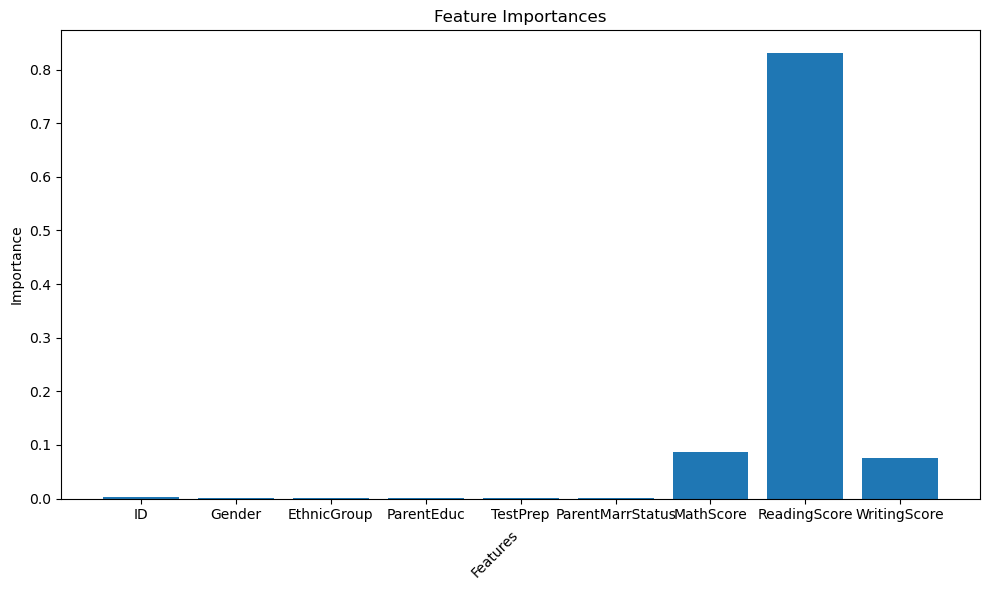

In [126]:
fig, ax = plt.subplots(figsize=(10, 6))
plt.bar(feature_names, feature_importances)
plt.xlabel('Features', rotation=45, ha='right') 
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.tight_layout() 
plt.show()

In [121]:
def convert_to_grades(predictions):
    return [round(p) for p in predictions]

In [122]:
new_data = df.head()
new_predictions = model.predict(new_data.drop(['OverallGrade', 'MathGrade', 'ReadingGrade', 'WritingGrade'], axis=1))
predicted_grades = convert_to_grades(new_predictions)

In [123]:
print("Predicted Overall Grades:")
print(predicted_grades)

Predicted Overall Grades:
[4, 0, 2, 2, 3]


In [130]:
all_predictions = model.predict(features)

In [132]:
new_data = df.tail()
new_predictions = model.predict(new_data.drop(['OverallGrade', 'MathGrade', 'ReadingGrade', 'WritingGrade'], axis=1))
predicted_grades = convert_to_grades(new_predictions)

In [133]:
print("Predicted Overall Grades:")
print(predicted_grades)

Predicted Overall Grades:
[0, 1, 0, 3, 1]


In [134]:
print("Predicted Overall Grades for the entire dataset:")
print(all_predictions)

Predicted Overall Grades for the entire dataset:
[3.98 0.   2.   ... 0.   3.   1.  ]
